# Implementation of Linear Regression


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading the Continuous numeric dataset into a DataFrame

In [5]:
# Loading the Continuous numeric dataset into a DataFrame
data = pd.read_csv('data_for_lr.csv')

# Data Exploration

## Checking the Dataset content
two columns. X is the independent Variable. Y is Dependent variable (Label)

In [6]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Checking the Shape. Total Rows and Columns in the dataset

In [7]:
data.shape

(700, 2)

 ## Summary or Overview of the DataFrame. This includes the number of entries, column names, non-null counts, and data types of each column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Describing the Statis tical information of the Numerical Dataset

In [9]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


# Data Cleaning

## Checking the Missing values

In [10]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [11]:
data[data.isnull().any(axis=1)]

,x,y
213,3530.157369,NaN


## Deleting the Rows having Missing values. since its only one row having the Null value - NaN

In [12]:
data_cleaned= data.dropna()

## Verifying for missing values after cleaning

In [13]:
data_cleaned[data_cleaned.isnull().any(axis=1)]

,x,y


# Storing the Dependent and Independent variables in separate Dataframes  before splitting for Machine Learning

In [14]:

X = data_cleaned.drop('y', axis=1)
Y = data_cleaned['y']
# checking the first few rows of the Dependent variables
Y.head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

## Checking the first few rows of the Independent variables

In [15]:
X.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


# Split the data into training and testing datasets for Machine Learning

In [16]:
# Split the data into training and testing datasets for Machine Learning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Creating a Linear Regression model and Training the model using the training dataset

In [17]:

model = LinearRegression()

# Training the model using the training data
model.fit(X_train, Y_train)


LinearRegression()

## Predicting the model using the Testing dataset

In [18]:
# Predicting the test dataset results
Y_pred = model.predict(X_test)


## Calculating the Performance metrics of the trained Linear regression model

In [19]:

# Calculating the performance metrics of the trained model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7.752986666319193
R-squared: 0.9910998765243975


##Interpretation of the Results
###Mean Squared Error (MSE)
Value: 7.752986666319193
Meaning: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates that the trained model's predictions are closer to the actual values. In this case, an MSE of approximately 7.75 suggests that, on average, the squared differences between the actual and predicted values are relatively low. However, the acceptability of this value depends on the scale of the target variable.

###R-squared (R²)
Value: 0.9910998765243975
Meaning: R² represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value of 0.9911 indicates that 99.11% of the variance in the target variable (Y) is explained by the model. This is an excellent value, suggesting that the model fits the data very well.

##Conclusion of the Prediction

#The Prediction results indicate that the trained linear regression model is performing exceptionally well:<br/>

#1) The low MSE indicates that the model's predictions are quite close to the actual values.<br/>
#2) The high R² value indicates that the model explains almost all the variability of the response data around its mean.

# Ploting the Training data, Test Data and the Regression Line using the Predited data to viusally prove the Closeness of the Predicted Results

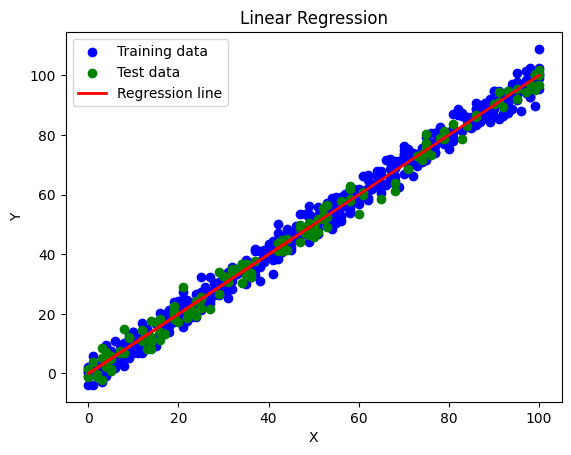

In [20]:
# Ploting the training data
plt.scatter(X_train, Y_train, color='blue', label='Training data')
# Ploting  the test data
plt.scatter(X_test, Y_test, color='green', label='Test data')
# Ploting  the regression line for the "data_for_lr.csv" dataset
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression line')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#Checking Residuals for random Distribution:

Ploting the residuals to ensure they are randomly distributed. This  helps to verify that the trained model's assumptions hold true (linearity, homoscedasticity, independence, and normality of residuals).

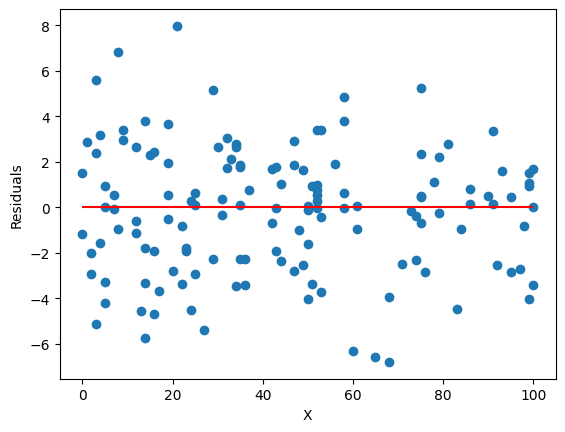

In [21]:
import matplotlib.pyplot as plt

residuals = Y_test - Y_pred
plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), colors='red')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


Note that Classification Report is not supoorted for continuous vaiable

#Cross-Validation:
Performing the  cross-validation to ensure that the trained model generalizes well to unseen data.

##Function:
cross_val_score() performs cross-validation by splitting the data into multiple folds, training the model on each fold, and evaluating it on the corresponding validation set. It returns an array of scores obtained from each cross-validation fold.<br/>
##Usage:
It is used to estimate the model's performance more robustly by averaging the scores from multiple train-test splits.
## Purpose:
Provides a more reliable estimate of the model's performance by mitigating the variability that can occur from a single train-test split. This is particularly useful when the dataset is small or when the model's performance is sensitive to the specific train-test split.

In [22]:
from sklearn.model_selection import cross_val_score

cv_mse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
cv_r2 = cross_val_score(model, X, Y, scoring='r2', cv=5)

print(f'Cross-Validated MSE: {-cv_mse.mean()}')
print(f'Cross-Validated R-squared: {cv_r2.mean()}')


Cross-Validated MSE: 7.953831094463889
Cross-Validated R-squared: 0.9903764720252457


##mean_squared_error():
Use it to evaluate the performance on a specific test set.<br/>
##cross_val_score():
Use it to perform cross-validation and get a more reliable estimate of the model's performance by averaging the scores from multiple folds.
<br/><br/>
By using both functions, we can get a comprehensive view of your model's performance: a specific measure on a test set with mean_squared_error(), and a more generalizable estimate with cross_val_score().
##Key Differences between mean_squared_error()  and cross_val_score()

##Scope:
mean_squared_error(): Measures performance on a single test set. <br/>
cross_val_score(): Measures performance across multiple train-test splits (folds).

##Output:
mean_squared_error(): Returns a single MSE value.<br/>
cross_val_score(): Returns an array of scores (one for each fold), which can be averaged to get a mean performance score.

##Robustness:
mean_squared_error(): The result can be sensitive to the particular train-test split.<br/>
cross_val_score(): Provides a more robust estimate by considering multiple splits.

##Usage in Cross-Validation:
mean_squared_error(): Typically used for evaluating the final model on a hold-out test set after the model has been tuned and validated.<br/>
cross_val_score(): Used during model development and tuning to assess the generalization performance of the model.


